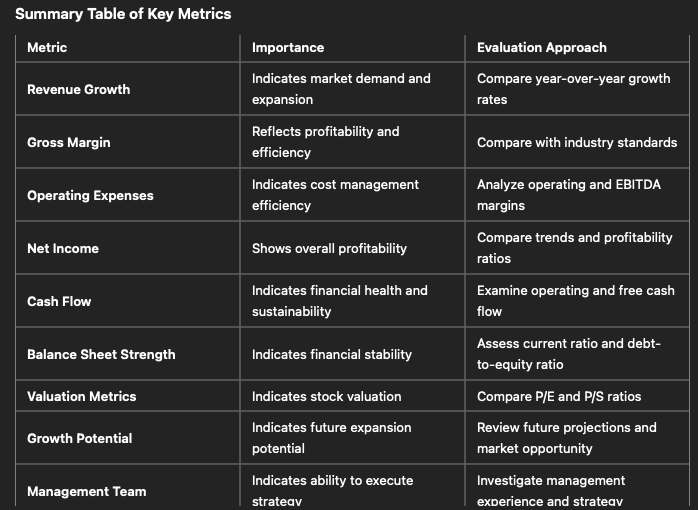

### Key Metrics 

#### Revenue Growth:
	
•	Why It Matters: Rapid revenue growth can indicate strong market demand and potential for future expansion. For IPO stocks, it’s essential to assess if the company can sustain its growth trajectory.
•	How to Evaluate: Look at the year-over-year revenue growth rate and compare it with industry peers.

#### Gross Margin:
	
•	Why It Matters: Gross margin reflects the percentage of revenue remaining after deducting the cost of goods sold (COGS). A higher gross margin suggests better profitability and operational efficiency.
•	How to Evaluate: Compare the gross margin with industry standards and historical data.

#### Operating Expenses and Efficiency Ratios:
	
•	Why It Matters: Operating expenses and efficiency ratios (e.g., operating margin, EBITDA margin) indicate how well the company manages its costs relative to its revenue.
•	How to Evaluate: Assess operating margin and EBITDA margin trends to determine operational efficiency.

#### Net Income and Profitability Ratios:

•	Why It Matters: Net income shows the company’s profitability after all expenses. Profitability ratios like ROE (Return on Equity) and ROA (Return on Assets) provide insight into how effectively the company uses its assets and equity.
•	How to Evaluate: Analyze net income trends and compare profitability ratios with industry benchmarks.

#### Cash Flow:

•	Why It Matters: Positive cash flow from operations indicates that the company generates enough cash to support its operations and growth. For IPO stocks, cash flow is crucial for assessing financial health and sustainability.
•	How to Evaluate: Examine operating cash flow and free cash flow.

#### Balance Sheet Strength:

•	Current Ratio: Measures liquidity by comparing current assets to current liabilities.
•	Debt-to-Equity Ratio: Assesses financial leverage by comparing total debt to total equity.
•	Why It Matters: A strong balance sheet with a healthy current ratio and manageable debt levels suggests financial stability and lower risk.
•	How to Evaluate: Compare these ratios with industry norms and peer companies.

#### Valuation Metrics:

•	Price-to-Earnings (P/E) Ratio: Indicates how much investors are willing to pay for each dollar of earnings.
•	Price-to-Sales (P/S) Ratio: Compares the company’s stock price to its revenue per share.
•	Why It Matters: Valuation metrics help determine if the stock is overvalued or undervalued relative to its earnings and sales.
•	How to Evaluate: Compare the ratios with historical values and industry averages.

#### Growth Potential:

•	Future Revenue and Earnings Projections: Analyst estimates for future growth.
•	Market Opportunity: Size and growth potential of the target market.
•	Why It Matters: Assessing growth potential helps gauge whether the company can expand and capture market share.
•	How to Evaluate: Review analyst reports and market research.

#### Management Team and Strategy:

•	Why It Matters: The experience and track record of the management team and their strategic vision are critical for executing the company’s growth plans and navigating challenges.
•	How to Evaluate: Investigate the background of key executives and their strategic goals for the company.

In [1]:
import yfinance as yf
from yahoo_fin.stock_info import *
from yahoo_fin import stock_info as si
import pandas as pd
import requests
from io import StringIO
from bs4 import BeautifulSoup

pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_rows', None)

In [2]:
# Fetch the stock data
ticker = 'CPNG'
stock = yf.Ticker(ticker)

In [3]:
# Balance sheet and income statement
balance_sheet = stock.balance_sheet
income_statement = stock.financials
cash_flow = stock.cashflow

# Define a function to convert data to millions of USD
def convert_to_millions(df):
    return df / 1_000_000

# Extract necessary data
# Convert balance sheet and income statement to millions
balance_sheet = convert_to_millions(balance_sheet)
income_statement = convert_to_millions(income_statement)
cash_flow = convert_to_millions(cash_flow)

In [4]:
# Net Income
net_income = income_statement.loc['Net Income'].dropna()

# Total Assets
total_assets = balance_sheet.loc['Total Assets'].dropna()

# Shareholders Equity
shareholders_equity = balance_sheet.loc['Stockholders Equity'].dropna()

# Invested Capital
invested_capital = balance_sheet.loc['Invested Capital'].dropna()

# Calculate Ratios
roe = net_income / shareholders_equity
roa = net_income / total_assets
roi = net_income / invested_capital

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Net Income': net_income,
    'Total Assets': total_assets,
    'Shareholders Equity': shareholders_equity,
    'Invested Capital': invested_capital,
    'ROE': roe,
    'ROA': roa,
    'ROI': roi
})


### Holders

In [5]:
# Institutions Holding Shares
holders_site = f"https://finance.yahoo.com/quote/{ticker}/holders"
# Set the number of rows pandas will display
pd.set_option('display.max_rows', 10)  # You can adjust the number here
# Fetch the HTML data
response = requests.get(holders_site, headers={'User-agent': 'Mozilla/5.0'})

# Check if response was successful
if response.status_code == 200:
    # Convert response text to StringIO object
    html_string = StringIO(response.text)
    
    # Try to read HTML tables
    try:
        tables = pd.read_html(html_string)
        print(f"Found {len(tables)} tables.")
        
        # Print each table separately
        for idx, table in enumerate(tables):
            print(f"\nTable {idx}:")
            #print(table)  # This will now display up to 20 rows (or however many you specify)
            print(table.to_string(index=False))  # Print the table without the index column
            
    except ValueError as e:
        print("Error reading HTML tables:", e)
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

Found 3 tables.

Table 0:
Breakdown                            Unnamed: 1
    0.79%       % of Shares Held by All Insider
   85.36%      % of Shares Held by Institutions
   86.04%       % of Float Held by Institutions
      713 Number of Institutions Holding Shares

Table 1:
                               Holder  Shares Date Reported  % Out      Value
      SB Investment Advisers (UK) LTD 349.54M  Jun 30, 2024 21.59% 8710593120
          Baillie Gifford and Company 171.35M  Jun 30, 2024 10.58% 4270042636
                       Morgan Stanley  85.89M  Jun 30, 2024  5.31% 2140286901
        Price (T.Rowe) Associates Inc  67.39M  Jun 30, 2024  4.16% 1679259199
      Capital International Investors  54.79M  Jun 30, 2024  3.38% 1365305326
       WCM Investment Management, LLC  51.86M  Jun 30, 2024  3.20% 1292237992
                       Blackrock Inc.  30.81M  Jun 30, 2024  1.90%  767733991
                Maverick Capital Ltd.  29.25M  Jun 30, 2024  1.81%  728985160
Massachusetts Institut

### Analysts & Estimates

In [6]:
def analysis_data(ticker):
    url = f"https://finance.yahoo.com/quote/{ticker}/analysis?p={ticker}"
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}
    
    # Fetch the page content
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the relevant tables
        tables = soup.find_all('table')
        
        # Print all tables to check their content
        for idx, table in enumerate(tables):
            print(f"\nTable {idx}:")
            # Convert the table HTML to a DataFrame using StringIO
            table_html = str(table)
            df = pd.read_html(StringIO(table_html))[0]
            print(df.head())  # Display the first few rows of the table
        
        # Extract specific data if needed
        # Example: Extract "Next 5 Years (per annum)" growth rate from the tables
        growth_rate = None
        for table in tables:
            if 'Next 5 Years (per annum)' in table.text:
                rows = table.find_all('tr')
                for row in rows:
                    columns = row.find_all('td')
                    if len(columns) >= 2 and 'Next 5 Years (per annum)' in columns[0].text:
                        growth_rate = columns[1].text.strip()
                        break
        
        print(f"Growth Rate for Next 5 Years (per annum): {growth_rate}")

    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")

In [7]:
# Usage example
analysis_data(ticker)
#################################
#Table 0 = Earning Estimates
#Table 1 = Revenue Estimates
#Table 3 = Earning History
#Table 4 = EPS Trend
#Table 5 = EPS Revision
#Table 6 = Growth Estimates
#Table 7 = Upgrades & Downgrades
#################################


Table 0:
   CURRENCY IN USD  Current Qtr. (Sep 2024)  Next Qtr. (Dec 2024)  \
0  No. of Analysts                     5.00                  5.00   
1    Avg. Estimate                     0.01                  0.02   
2     Low Estimate                     0.00                 -0.01   
3    High Estimate                     0.02                  0.08   
4     Year Ago EPS                     0.05                  0.08   

   Current Year (2024)  Next Year (2025)  
0                 9.00             11.00  
1                -0.01              0.53  
2                -0.07              0.00  
3                 0.02              0.78  
4                 0.26             -0.01  

Table 1:
   CURRENCY IN USD Current Qtr. (Sep 2024) Next Qtr. (Dec 2024)  \
0  No. of Analysts                       6                    6   
1    Avg. Estimate                   7.74B                8.22B   
2     Low Estimate                   7.64B                8.04B   
3    High Estimate                   7.

### Financial Stats

In [8]:
def key_stats(ticker):
    # Define the URL for the data using the ticker variable
    url = f"https://finance.yahoo.com/quote/{ticker}/key-statistics/"
    
    # Set up headers to mimic a browser visit
    headers = {
        'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246"
    }
    
    # Fetch the page
    response = requests.get(url, headers=headers)
    
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find all tables on the page
    tables = soup.find_all("table")
    
    # Print each table one by one, skipping Table 2 (index 1)
    for i, table in enumerate(tables):
        if i == 1:  # Skip Table 2 (index 1)
            continue
        
        try:
            # Convert the table HTML to a DataFrame
            html_string = str(table)
            df = pd.read_html(StringIO(html_string))[0]
            
            # Print the table with an index for reference
            print(f"\nTable {i + 1}:")
            print(df)
            
        except Exception as e:
            print(f"Error parsing table {i + 1}: {e}")

In [9]:
key_stats(ticker)


Table 1:
                 Unnamed: 0 Current 6/30/2024 3/31/2024 12/31/2023 9/30/2023  \
0                Market Cap  44.65B    37.46B    31.90B     28.94B    30.32B   
1          Enterprise Value  42.82B    35.85B    29.45B     26.87B    28.57B   
2              Trailing P/E   42.91     29.81     23.72      67.46     70.83   
3               Forward P/E      --        --        --      27.93     29.33   
4  PEG Ratio (5yr expected)      --        --        --         --        --   
5               Price/Sales    1.65      1.47      1.32       1.25      1.37   
6                Price/Book   11.58      9.18      7.81       9.90     10.94   
7  Enterprise Value/Revenue    1.58      1.40      1.21       1.16      1.29   
8   Enterprise Value/EBITDA   54.35     40.19     32.47      33.53     37.47   

  6/30/2023 3/31/2023 12/31/2022  
0    30.99B        --         --  
1    29.59B        --         --  
2    145.00        --         --  
3    111.11    112.36     105.26  
4        --   